In [1]:
import numpy as np
import keras
from keras.models import Sequential #Ovo je, ako sam dobro shvatio, za slaganje slojeva UNM
from keras.layers import Dense #A ovo je za UNM gdje su svi neuroni između slojeva povezani, dakle gusto povezani
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Epoch 1/500
1000/1000 [==============================] - 0s 75us/step - loss: 2.6646 - accuracy: 0.4740
Epoch 2/500
1000/1000 [==============================] - 0s 15us/step - loss: 0.9373 - accuracy: 0.4520
Epoch 3/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.6058 - accuracy: 0.6520
Epoch 4/500
1000/1000 [==============================] - 0s 15us/step - loss: 0.4712 - accuracy: 0.8240
Epoch 5/500
1000/1000 [==============================] - 0s 14us/step - loss: 0.4052 - accuracy: 0.8640
Epoch 6/500
1000/1000 [==============================] - 0s 13us/step - loss: 0.3610 - accuracy: 0.8950
Epoch 7/500
1000/1000 [==============================] - 0s 15us/step - loss: 0.3340 - accuracy: 0.9100
Epoch 8/500
1000/1000 [==============================] - 0s 14us/step - loss: 0.2997 - accuracy: 0.9300
Epoch 9/500
1000/1000 [==============================] - 0s 15us/step - loss: 0.2679 - accuracy: 0.9440
Epoch 10/500
1000/1000 [==============================] - 0s 15u

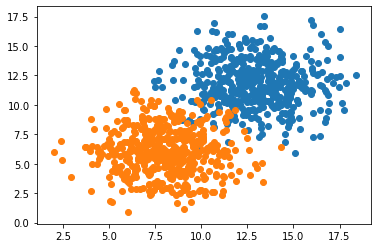

In [14]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb)) #Spajam Xa i Xb skup podataka
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T #Pridjeljujemo oznaku 1 ili 0 za pojedini skup podataka.
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])


model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam=Adam(lr = 0.1 )
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50,epochs=500, shuffle='true')

Text(0.5, 0, 'epoch')

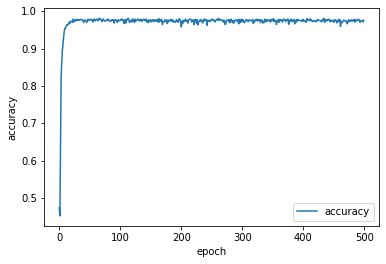

In [15]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

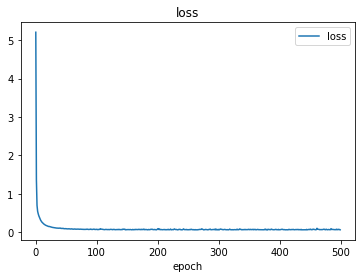

In [12]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [25]:
#X - array podataka, y- matrica oznaka za podakte; 1 donji dio; 0 gornji dio, #model - sadrži podatke o UNM
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1) #Obuhvaća horizontalni dio podataka, služi za organiziranej grafičkog prikaza
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)  #Obuhvaća vertikalni dio podataka, služi za organiziranej grafičkog prikaza 
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_] # Do ovog dijela organiziram "mjere" za formiranje grafičkog prikaza
    pred_func = model.predict(grid)# Ovdje ubacujem podatke o UNM u grafički prikaz. 
    #Generates output predictions for the input samples. Computation is done in batches.U ovom slučaju predviđa vjerojatnost neke točke
    # da ima iznos 1, tj. da osoba nije bolesna.
    z = pred_func.reshape(xx.shape) # Prilagođavam rezultate predikcije već formiranim grafičkim parametrima.
    plt.contourf(xx, yy, z) # xx i yy sadrže podatke o koordinatama, z sadrži podatak o razini predikcijske vrijednosti neke točke. 
    #Nakon ovoga treba ucrtati i točke. Pitanje: Kako se formira ovaj postupni prijelaz boja? Da li je to automatski odeđeno u funkciji?
    #Odgovor: To je, ako se ne varam, zadatak funkcije contourf

[ 1.01077428  1.38591048  1.76104668  2.13618288  2.51131908  2.88645528
  3.26159148  3.63672768  4.01186388  4.38700008  4.76213628  5.13727249
  5.51240869  5.88754489  6.26268109  6.63781729  7.01295349  7.38808969
  7.76322589  8.13836209  8.51349829  8.88863449  9.26377069  9.63890689
 10.01404309 10.38917929 10.76431549 11.13945169 11.51458789 11.88972409
 12.2648603  12.6399965  13.0151327  13.3902689  13.7654051  14.1405413
 14.5156775  14.8908137  15.2659499  15.6410861  16.0162223  16.3913585
 16.7664947  17.1416309  17.5167671  17.8919033  18.2670395  18.6421757
 19.0173119  19.39244811]


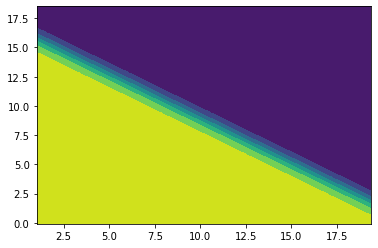

In [26]:
plot_decision_boundary(X, y, model)

[ 1.01077428  1.38591048  1.76104668  2.13618288  2.51131908  2.88645528
  3.26159148  3.63672768  4.01186388  4.38700008  4.76213628  5.13727249
  5.51240869  5.88754489  6.26268109  6.63781729  7.01295349  7.38808969
  7.76322589  8.13836209  8.51349829  8.88863449  9.26377069  9.63890689
 10.01404309 10.38917929 10.76431549 11.13945169 11.51458789 11.88972409
 12.2648603  12.6399965  13.0151327  13.3902689  13.7654051  14.1405413
 14.5156775  14.8908137  15.2659499  15.6410861  16.0162223  16.3913585
 16.7664947  17.1416309  17.5167671  17.8919033  18.2670395  18.6421757
 19.0173119  19.39244811]
[ 1.01077428  1.38591048  1.76104668  2.13618288  2.51131908  2.88645528
  3.26159148  3.63672768  4.01186388  4.38700008  4.76213628  5.13727249
  5.51240869  5.88754489  6.26268109  6.63781729  7.01295349  7.38808969
  7.76322589  8.13836209  8.51349829  8.88863449  9.26377069  9.63890689
 10.01404309 10.38917929 10.76431549 11.13945169 11.51458789 11.88972409
 12.2648603  12.6399965  13.

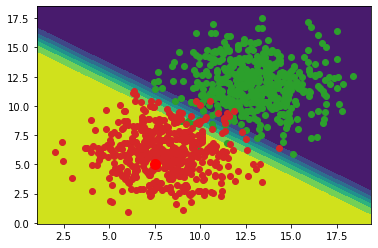

In [27]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
 
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
 
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)